## Twitter  Analysis of the Uganda Economic Forum Discussions 2024

In this notebook I use the NRCLex library by [(C) 2019 Mark M. Bailey, PhD](https://pypi.org/project/NRCLex/), for sentiment analysis/categorisation, and [ntscraper](https://pypi.org/project/ntscraper/), very new just released on September 1, 2024 to scrape tweets from X formerly tweeter, and [nltk](https://www.nltk.org/).


The main objective is to retreive tweets about the current ongoing topic **Uganda Economic Forum**, analyse the sentiments expressed in the discussions, and using the most recurring topics/ themes give policy direction to the governmnet on the next course of action
```
# This is formatted as code
```



In [ ]:
%%capture
!pip install NRCLex
!pip install ntscraper
!pip install nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
from ntscraper import Nitter
from nrclex import NRCLex
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# Download stop words
nltk.download('punkt')
nltk.download('stopwords')
#initiate Nitter Scraper
Scraper=Nitter()


Testing instances: 100%|██████████| 16/16 [00:22<00:00,  1.39s/it]


# Retrieve  the tweets

In [ ]:
# A function that retrieves the tweets and returns a pandas data frame
def get_tweet(name,mode, number_of_tweets):
  tweet_f=Scraper.get_tweets(terms=name,mode=mode,number=number_of_tweets)
  tweet_forum=[]
  for tweet in tweet_f["tweets"]:
    data=[tweet["link"],tweet["text"], tweet["date"], tweet["stats"]["likes"], tweet["stats"]["comments"], tweet["stats"]["retweets"]]
    tweet_forum.append(data)
  df_f=pd.DataFrame(tweet_forum,columns=["link","text","date","likes","comments","retweets"])
  return df_f


In [ ]:
df_f= get_tweet('UGEconomicForum','hashtag',200)

INFO:root:No instance specified, using random instance https://nitter.lucabased.xyz
INFO:root:Current stats for UGEconomicForum: 6 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 14 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 21 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 32 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 38 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 44 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 50 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 60 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 65 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 67 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 71 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 79 tweets, 0 threads...
INFO:root:Current stats for UGEconomicForum: 82 tweets, 0 threads...
INFO:root:Current st

In [ ]:
df_f.to_csv('UGEconomicForum_150.csv')
df_f=pd.read_csv('UGEconomicForum_150.csv')
df_f.head()

,Unnamed: 0,link,text,date,likes,comments,retweets
0,0,https://twitter.com/KigoziJoe/status/183736288...,Yesterday marked the end of the 4th #UGEconomi...,"Sep 21, 2024 · 5:27 AM UTC",11,1,3
1,1,https://twitter.com/KigoziJoe/status/183736517...,None of this would have been possible without ...,"Sep 21, 2024 · 5:36 AM UTC",2,0,1
2,2,https://twitter.com/KigoziJoe/status/183736439...,I would like to extend a special thanks to our...,"Sep 21, 2024 · 5:33 AM UTC",1,0,0
3,3,https://twitter.com/andrewkabuura/status/18371...,Honored to have moderated the #UGEconomicForum...,"Sep 20, 2024 · 5:42 PM UTC",230,8,23
4,4,https://twitter.com/NBSportUg/status/183709385...,Happening Now : The 4th #UGEconomicForum enter...,"Sep 20, 2024 · 11:38 AM UTC",18,0,6


As it can be seen, the tweets range from the the current period, as of today September 21st, 2024.

From the tail it goes back to as far as 18th, covering about four days of discussion on with regards to the forumn

In [ ]:
df_f.tail()

,Unnamed: 0,link,text,date,likes,comments,retweets
195,195,https://twitter.com/nbstv/status/1836400136223...,Dr Sam Koojo Mugume: Green investments are a b...,"Sep 18, 2024 · 1:41 PM UTC",5,0,0
196,196,https://twitter.com/nbstv/status/1836398931162...,.@ekavu_: We know #BeeraSteady's goal is to ma...,"Sep 18, 2024 · 1:36 PM UTC",7,0,0
197,197,https://twitter.com/nbstv/status/1836398275101...,".@ekavu_, Head of Special Projects, @nextmedia...","Sep 18, 2024 · 1:34 PM UTC",7,0,0
198,198,https://twitter.com/nbstv/status/1836397718920...,".@ekavu_, Head of Special Projects, @nextmedia...","Sep 18, 2024 · 1:31 PM UTC",3,0,0
199,199,https://twitter.com/nbstv/status/1836397694622...,".@ekavu_, Head of Special Projects, @nextmedia...","Sep 18, 2024 · 1:31 PM UTC",2,1,0


In [ ]:
df_f.shape

(200, 7)

# Clean the text part of the tweets

In [ ]:
# Function to clean the text and remove videos
def clean_tweet(df):
  #Concatenating all text as string
  text=' '.join(df["text"].astype(str).tolist())
    # Remove URLs (including those pointing to videos or media)
  text = re.sub(r"http\S+|www\S+|https\S+|pic\.twitter\.com\S+|t\.co\S+", '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
    # Remove emojis (optional)
  text = text.encode('ascii', 'ignore').decode('ascii')
    # Strip leading/trailing whitespace
  text = text.strip()
  return text

In [ ]:
clean_tweet(df_f)

'Yesterday marked the end of the 4th  which has brought together key stakeholders to engage in discussions about Uganda\'s economic growth.  We have managed to gather 50 panellists from both the government and the private sector. None of this would have been possible without the support of our partners, keynote speakers, panelists, moderators, viewers, and the millions of people who engaged with us online. You have made the  a platform where ideas meet action.   I would like to extend a special thanks to our Guest of Honor, Rt. Hon. . His remarks highlighted the significance of the forum. He clarified NBS is doing my coursework for me, The  is going to have a big impact on how we operate as government. Honored to have moderated the  with Sport as the focus today. Thank you deputy speaker  for joining us.    Happening Now : The 4th  enters its final day with the focus on unlocking economic opportunities for Uganda\'s youth through sports.  Catch the event live on NBS Sport and .    Rt H

# Carry out Sentimental Analysis

In [ ]:
# A function tha analyses the text part of the tweets, and returns the sentiments
def text_analysis(df):
  text=clean_tweet(df)
  emotion=NRCLex(text)
  for category, frequency in emotion.raw_emotion_scores.items():
    df=pd.DataFrame([(category, frequency) for category, frequency in emotion.raw_emotion_scores.items()], columns=['Category', 'Frequency'])
  df=df.sort_values(by='Frequency', ascending=False)
  df.set_index('Category', inplace=True)
  return df


In [ ]:
Sentiments= text_analysis(df_f)
Sentiments

,Frequency
Category,
positive,330
trust,148
anticipation,111
joy,102
negative,64
fear,46
surprise,42
sadness,32
anger,21


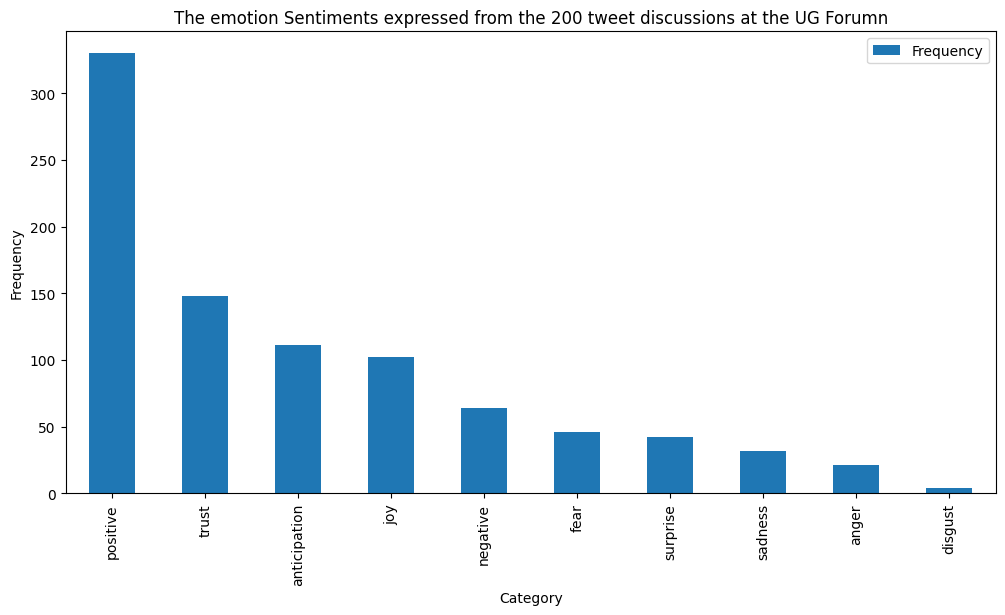

In [ ]:
Sentiments.plot(kind="bar", figsize=(12, 6))
plt.title("The emotion Sentiments expressed from the 200 tweet discussions at the UG Forumn")
plt.ylabel("Frequency");

# Use word cloud to get the most recurring themes in the discussions

In [ ]:
def plot_wordcloud(df):
  #Concatenating all text as string
  text=text=clean_tweet(df)
  # Add words to exclude from the word cloud
  custom_stopwords = set(STOPWORDS)
  custom_stopwords.update(["Uganda","one", "need","year", "sector", "will","come", "government", "VIDEO","today", "Moses Bekabye", "Deputy Speaker", "country"])
# Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)
  # Display the word cloud using matplotlib
  plt.figure(figsize=(12, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title("Word Cloud of the 200 tweet discussions at the UG Forumn, 2024")
  plt.axis('off')  # Turn off axis labels
  plt.show()


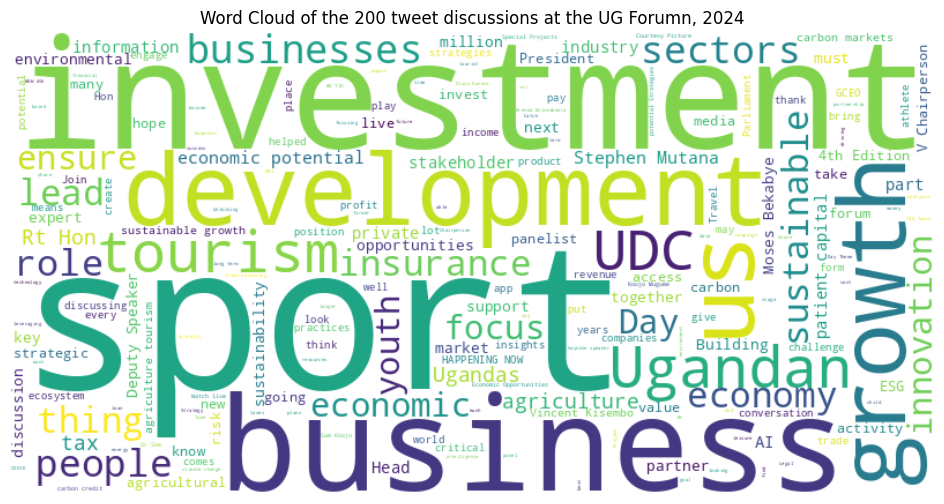

In [ ]:
plot_wordcloud(df_f)